# Gram-Scmidth

In [ ]:
"""
    You can use this code freely if you are in a university and 
    use it for publishing, studying, or teaching
    © 2020, Cahya Amalinadhi Putra
    
    Reach me on
    Github    : https://github.com/cahyaamalinadhi
    LinkedIn  : https://www.linkedin.com/in/cahya-amalinadhi/
"""

## Import Library

In [242]:
# Import library
import math
import matplotlib.pyplot as plt
import numpy as np
import random

from matplotlib.gridspec import GridSpec
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import (Axes3D, proj3d)

## Define Class and Function

### Class

In [243]:
# Class
# Create arrow visualization
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

### Function

In [244]:
# Linearly independent vectors
def generate(lb, ub):
    """
        This function generates linearly independent 3 random-integer vectors of dimension 3
        from defined lower to upper bound

        input:
            lb      : lower bound
            ub      : upper bound
        output:
            vec     : linearly independent vectors
    """
    # Initialization
    vec = np.zeros((3, 3))
    det = 0

    # Generation
    while (det == 0):
        for i in range(3):
            for j in range(3):
                # assign random integer to vector
                vec[i][j] = random.randint(lb, ub)

        # Check if the vectors are linearly independent
        # If det(vec) != 0, the vectors are linearly independent
        # else, re-generate random integer
        det = np.linalg.det(vec)

    return (vec)


In [245]:
# Magnitude of a vector
def magnitude(u):
    """
        This function calculates the magnitude of a vector
        input:
            u   : vector
        output:
            mag : magnitude of vector-u
    """
    sum = 0
    for i in range(len(u)):
        sum = sum + u[i]**2

    mag = math.sqrt(sum)

    return (mag)


In [246]:
# Normalize vector
def normalize(u):
    """
        This function generates norm of a vector
        input:
            u       : vector
        output:
            normU   : norm of u
    """
    magU = magnitude(u)
    normU = u/magU

    return (normU)


In [247]:
# Projection of 2 vectors
def projection(u, V):
    """
        This function projects the vector V orthogonally onto the line spanned by vector u
        input:
            u       : target vectors
            V       : source vectors
        output:
            proj    : projection vectors
    """
    upper = np.dot(V, u)
    lower = np.dot(u, u)
    proj = float(upper/lower)*u

    return (proj)


In [248]:
# Gram-Schmidt procedures
def gramSchmidt(vec):
    """
        This function generates orthogonal and orthonormal basis vectors from the given vectors using
        Gram-Schmidt procedures
        input:
            vec     : initial basis vectors
        output:
            orthogonalBasis     : orthogonal basis vectors
            orthonormalBasis    : orthonormal basis vectors
    """
    # Initialization
    dim = len(vec)
    orthogonalBasis = np.zeros((dim, 3))
    orthonormalBasis = np.zeros((dim, 3))

    # Calculate orthogonal basis using Gram-Schmidt process
    # Follows Eq. (1.14)
    # Source: Apostol, T. M. (1969). Calculus, Vol. 2: Multi-Variable Calculus and -
    # Linear Algebra with Applications to Differential Equations and Probability (2nd ed.). Wiley.
    # Define first orthogonal basis
    orthogonalBasis[0] = vec[0]

    # calculate the rest of orthogonal basis
    for i in range(1, dim):
        sumProjection = 0
        for j in range(i):
            u = orthogonalBasis[j]
            V = vec[i]
            sumProjection = sumProjection + projection(u, V)
        orthogonalBasis[i] = vec[i] - sumProjection     # Eq. (1.14)

    # Calculate orthonormal basis
    for i in range(dim):
        orthonormalBasis[i] = normalize(orthogonalBasis[i])

    return (np.round(orthogonalBasis,3), np.round(orthonormalBasis,3))


In [249]:
# post processing
def postProcess(vec, orthogonalVec, orthonormalVec):
    """
        This function generates post process of Gram-Schmidt process which contain:
            1. Log results
            2. Vector visualization
        input:
            vec             : initial vectors
            orthogonalVec   : orthogonal vectors vec
            orthonormalVec  : orthonormal vectors vec
        output:
            log results
            visualization
    """
    # Log results
    print(f'> Initialize')
    print(f'Vectors:')
    print(f'{vec}')
    print(f'')
    print(f'> Results')
    print(f'Orthogonal vectors:')
    print(f'{orthogonalVec}')
    print(f'')
    print(f'Orthonormal vectors:')
    print(f'{orthonormalVec}')


    # Begin Initialization
    arrayS = np.zeros((len(vec) + 1, 3))
    arrayG = np.zeros((len(vec) + 1, 3))
    arrayN = np.zeros((len(vec) + 1, 3))
    xS, yS, zS = [], [], []
    xG, yG, zG = [], [], []
    xN, yN, zN = [], [], []

    # Convert vector
    for i in range(len(vec)):
        arrayS[i + 1] = vec[i]
        arrayG[i + 1] = orthogonalVec[i]
        arrayN[i + 1] = orthonormalVec[i]

    for i in range(len(arrayS)):
        xS.append(arrayS[i][0])
        yS.append(arrayS[i][1])
        zS.append(arrayS[i][2])

        xG.append(arrayG[i][0])
        yG.append(arrayG[i][1])
        zG.append(arrayG[i][2])

        xN.append(arrayN[i][0])
        yN.append(arrayN[i][1])
        zN.append(arrayN[i][2])

    # Begin plotting
    # fig = plt.figure(figsize=(10, 8))
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    gs = GridSpec(3, 2, figure=fig)
    ax = fig.add_subplot(gs[1:, 0], projection='3d', autoscale_on=True)
    axXY = fig.add_subplot(gs[0, 1])
    axXZ = fig.add_subplot(gs[1, 1])
    axYZ = fig.add_subplot(gs[2, 1])

    # Plot origin
    ax.scatter(xS[0], yS[0], zS[0], s=70, c='k', marker='o')
    ax.text(xS[0], yS[0], zS[0],
            'Origin\n(%s, %s, %s)' % (str(xS[0]), str(yS[0]), str(zS[0])),
            size=10, zorder=10, color='k', horizontalalignment='right')

    # Plot source vectors
    ax.scatter(xS[1:], yS[1:], zS[1:], s=25, c='g', marker='.')
    for i in range(1, len(arrayS)):
        # ax.text(xS[i], yS[i], zS[i],
        #      '(%s, %s, %s)' % (str(xS[i]), str(yS[i]), str(zS[i])),
        #      size=10, zorder=10, color='k')
        ax.text(xS[i], yS[i], zS[i],
                '%s' % str(i),
                size=10, zorder=10, color='k')
    for i in range(1, len(arrayS)):
        arw = Arrow3D([xS[0], xS[i]], [yS[0], yS[i]], [zS[0], zS[i]],
                      arrowstyle="-|>", color="green", lw=1, mutation_scale=25)
        ax.add_artist(arw)

    # Plot orthogonal vectors
    ax.scatter(xG[1:], yG[1:], zG[1:], s=25, c='b', marker='.')
    for i in range(1, len(arrayG)):
        # ax.text(xG[i], yG[i], zG[i],
        #      '(%s, %s, %s)' % (str(xG[i]), str(yG[i]), str(zG[i])),
        #      size=10, zorder=10, color='k')
        ax.text(xG[i], yG[i], zG[i],
                '%s' % str(i),
                size=10, zorder=10, color='k')
    for i in range(1, len(arrayG)):
        arw = Arrow3D([xG[0], xG[i]], [yG[0], yG[i]], [zG[0], zG[i]],
                      arrowstyle="-|>", color="blue", lw=1, mutation_scale=25)
        ax.add_artist(arw)

    # Plot orthonormal vectors
    ax.scatter(xN[1:], yN[1:], zN[1:], s=25, c='r', marker='.')
    for i in range(1, len(arrayN)):
        arw = Arrow3D([xN[0], xN[i]], [yN[0], yN[i]], [zN[0], zN[i]],
                      arrowstyle="-|>", color="red", lw=3, mutation_scale=10)
        ax.add_artist(arw)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.legend(['Origin', 'Initial', 'Orthogonal', 'Orthonormal'],
              loc="best")

    # FOR XY
    axXY.scatter(xS[0], yS[0], s=70, c='k', marker='o')
    axXY.scatter(xS[1:], yS[1:], s=25, c='g', marker='.')
    for i in range(1, len(arrayS)):
        # axXY.text(xS[i], yS[i],
        #      '(%s, %s, %s)' % (str(xS[i]), str(yS[i]), str(zS[i])),
        #      size=10, zorder=10, color='k')
        axXY.text(xS[i], yS[i],
                  '%s' % str(i),
                  size=10, zorder=10, color='k')
    for i in range(1, len(arrayS)):
        axXY.plot([xS[0], xS[i]], [yS[0], yS[i]], c='green')

    axXY.scatter(xG[1:], yG[1:], s=25, c='b', marker='.')
    for i in range(1, len(arrayG)):
        # axXY.text(xG[i], yG[i],
        #      '(%s, %s, %s)' % (str(xG[i]), str(yG[i]), str(zG[i])),
        #      size=10, zorder=10, color='k')
        axXY.text(xG[i], yG[i],
                  '%s' % str(i),
                  size=10, zorder=10, color='k')
    for i in range(1, len(arrayG)):
        axXY.plot([xG[0], xG[i]], [yG[0], yG[i]], c='blue')

    for i in range(1, len(arrayN)):
        axXY.plot([xN[0], xN[i]], [yN[0], yN[i]], c='red')

    axXY.set_xlabel('X')
    axXY.set_ylabel('Y')
    axXY.grid()

    # FOR XZ
    axXZ.scatter(xS[0], zS[0], s=70, c='k', marker='o')
    axXZ.scatter(xS[1:], zS[1:], s=25, c='g', marker='.')
    for i in range(1, len(arrayS)):
        # axXZ.text(xS[i], zS[i],
        #      '(%s, %s, %s)' % (str(xS[i]), str(yS[i]), str(zS[i])),
        #      size=10, zorder=10, color='k')
        axXZ.text(xS[i], zS[i],
                  '%s' % str(i),
                  size=10, zorder=10, color='k')
    for i in range(1, len(arrayS)):
        axXZ.plot([xS[0], xS[i]], [zS[0], zS[i]], c='green')

    axXZ.scatter(xG[1:], zG[1:], s=25, c='b', marker='.')
    for i in range(1, len(arrayG)):
        # axXZ.text(xG[i], zG[i],
        #      '(%s, %s, %s)' % (str(xG[i]), str(yG[i]), str(zG[i])),
        #      size=10, zorder=10, color='k')
        axXZ.text(xG[i], zG[i],
                  '%s' % str(i),
                  size=10, zorder=10, color='k')
    for i in range(1, len(arrayG)):
        axXZ.plot([xG[0], xG[i]], [zG[0], zG[i]], c='blue')

    for i in range(1, len(arrayN)):
        axXZ.plot([xN[0], xN[i]], [zN[0], zN[i]], c='red')

    axXZ.set_xlabel('X')
    axXZ.set_ylabel('Z')
    axXZ.grid()

    # FOR YZ
    axYZ.scatter(yS[0], zS[0], s=70, c='k', marker='o')
    axYZ.scatter(yS[1:], zS[1:], s=25, c='g', marker='.')
    for i in range(1, len(arrayS)):
        # axYZ.text(yS[i], zS[i],
        #      '(%s, %s, %s)' % (str(xS[i]), str(yS[i]), str(zS[i])),
        #      size=10, zorder=10, color='k')
        axYZ.text(yS[i], zS[i],
                  '%s' % str(i),
                  size=10, zorder=10, color='k')
    for i in range(1, len(arrayS)):
        axYZ.plot([yS[0], yS[i]], [zS[0], zS[i]], c='green')

    axYZ.scatter(yG[1:], zG[1:], s=25, c='b', marker='.')
    for i in range(1, len(arrayG)):
        # axYZ.text(yG[i], zG[i],
        #      '(%s, %s, %s)' % (str(xG[i]), str(yG[i]), str(zG[i])),
        #      size=10, zorder=10, color='k')
        axYZ.text(yG[i], zG[i],
                  '%s' % str(i),
                  size=10, zorder=10, color='k')
    for i in range(1, len(arrayG)):
        axYZ.plot([yG[0], yG[i]], [zG[0], zG[i]], c='blue')

    for i in range(1, len(arrayN)):
        axYZ.plot([yN[0], yN[i]], [zN[0], zN[i]], c='red')

    axYZ.set_xlabel('Y')
    axYZ.set_ylabel('Z')
    axYZ.grid()

    plt.show()


## Executes

> Initialize
Vectors:
[[-6.  2.  3.]
 [-3. -9.  8.]
 [ 7. -3.  2.]]

> Results
Orthogonal vectors:
[[-6.     2.     3.   ]
 [-0.061 -9.98   6.531]
 [ 1.875  1.701  2.617]]

Orthonormal vectors:
[[-0.857  0.286  0.429]
 [-0.005 -0.837  0.548]
 [ 0.515  0.467  0.719]]


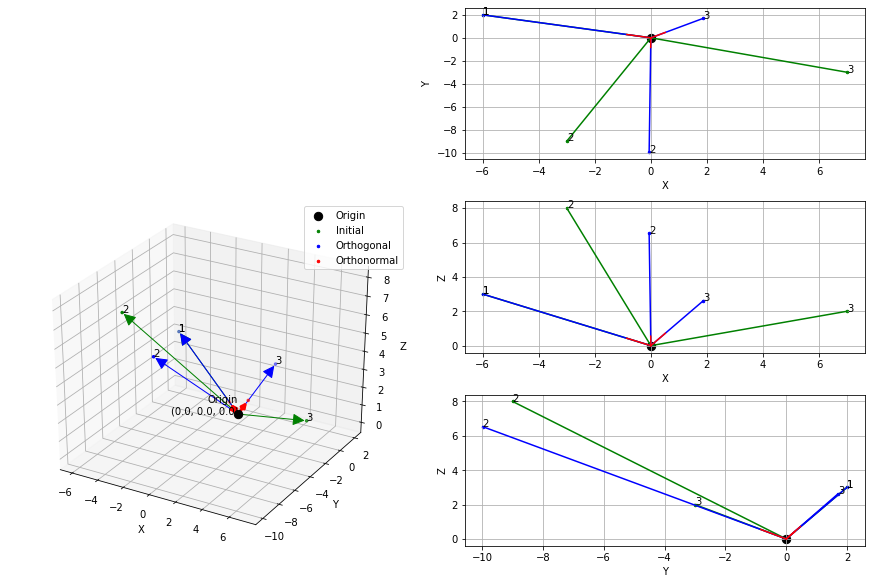

In [276]:
# Executes
# Generate linearly independent vectors
lowerBound = -10
upperBound = 10
vec = generate(lowerBound, upperBound)

# Find the orthogonal and orthonormal basis vectors
orthogonalVec, orthonormalVec = gramSchmidt(vec)

# Post processing
postProcess(vec, orthogonalVec, orthonormalVec)
# ---